# Results obtained using various solvers for the Vehicle Routing Problem
The `cost` acts as a parameter of comparison between different solvers. In this project it is the total sum of distances of the routes by each vehicle.
The approximation ratio is the ratio of the cost of the obtained from the solver to that of the best known solution. The closer it is to 1, the better the solver is.

By default the `LeapHybridCQMSampler` lets the solver run for around **5 seconds**. For better results this can be increased by passing a parameter `time_limit` into the solver's `.solve()` method. However, one needs to be careful about it as running it for too long may exhaust the limit of resources that D-Wave provides.

In [1]:
import numpy as np

class Initializer:

    def __init__(self, n, a, b):
        self.n = n
        self.a = a
        self.b = b

    def generate_nodes_and_weight_matrix(self):

        n = self.n
        a = self.a
        b = self.b
        
        np.random.seed(100*a + b)

        x = (np.random.rand(n) - 0.5) * 50
        y = (np.random.rand(n) - 0.5) * 50

        weight_matrix = np.zeros([n, n])
        for i in range(n):
            for j in range(i+1, n):
                weight_matrix[i, j] = (x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2
                weight_matrix[j, i] = weight_matrix[i, j]

        return x, y, weight_matrix

In [2]:
from utils import VRPSolver, compare_solvers, random_routing_instance

n=7     # number of clients
m=3     # number of vehicles

initializer = Initializer(n+1, n+1, 3)
xc, yc, cost = initializer.generate_nodes_and_weight_matrix()

In [3]:
cost

array([[0.00000000e+00, 1.76966259e+03, 1.56151212e+03, 2.51484467e+00,
        5.05548610e+02, 6.85893452e+02, 1.59617665e+03, 1.51029321e+03],
       [1.76966259e+03, 0.00000000e+00, 2.08545695e+02, 1.80130674e+03,
        4.42917457e+02, 1.07221748e+03, 2.39893355e+02, 1.32294153e+01],
       [1.56151212e+03, 2.08545695e+02, 0.00000000e+00, 1.54774039e+03,
        6.02185131e+02, 4.73871326e+02, 1.26328843e+00, 2.34521579e+02],
       [2.51484467e+00, 1.80130674e+03, 1.54774039e+03, 0.00000000e+00,
        5.40449602e+02, 6.36698400e+02, 1.57895555e+03, 1.54480936e+03],
       [5.05548610e+02, 4.42917457e+02, 6.02185131e+02, 5.40449602e+02,
        0.00000000e+00, 7.03255072e+02, 6.47693726e+02, 3.06188923e+02],
       [6.85893452e+02, 1.07221748e+03, 4.73871326e+02, 6.36698400e+02,
        7.03255072e+02, 0.00000000e+00, 4.61443354e+02, 9.86776724e+02],
       [1.59617665e+03, 2.39893355e+02, 1.26328843e+00, 1.57895555e+03,
        6.47693726e+02, 4.61443354e+02, 0.00000000e+00, 2.

In [4]:
### Select the type of model to solve VRP
#    1: Constrained Quadratic Model - A new model released by D-Wave Systems capable of encoding Quadratically Constrained Quadratic Programs (QCQPs)
#    2: Binary Quadratic Model - A model that encodes Ising or QUBO problems
model = 'CQM'


### The time limit (in seconds) for the solvers to run on the `LeapHybridCQMSampler` backend
time_limit = 5


### Select solver
#    1: RAS (Route Activation Solver)
#    2: FQS (Full QUBO Solver)
#    3: GPS (Guillermo, Parfait, Saúl) (only using CQM)
#    4: DBSCANS (Density-Based Spatial Clustering of Applications with Noise - Solver)
#    5: SPS (Solution Partition Solver)
solver = 'fqs'

In [5]:
vrps = VRPSolver(n, m, cost, xc, yc, model=model, solver=solver, time_limit=time_limit)
vrps.solve_vrp()


FULL QUBO SOLVER (Constrained Quadratic Model)
12 feasible solutions of 40.
Minimum total cost: 4126.300842533316 ____(X)
Minimum total cost: 4634.364297244428
Number of variables: 240
Runtime: 4952.636 ms
Sample(sample={'x.0.1.1': 0.0, 'x.0.1.2': 0.0, 'x.0.1.3': 0.0, 'x.0.10.1': 0.0, 'x.0.10.2': 0.0, 'x.0.10.3': 1.0, 'x.0.2.1': 0.0, 'x.0.2.2': 1.0, 'x.0.2.3': 0.0, 'x.0.3.1': 0.0, 'x.0.3.2': 0.0, 'x.0.3.3': 0.0, 'x.0.4.1': 1.0, 'x.0.4.2': 0.0, 'x.0.4.3': 0.0, 'x.0.5.1': 0.0, 'x.0.5.2': 0.0, 'x.0.5.3': 0.0, 'x.0.6.1': 0.0, 'x.0.6.2': 0.0, 'x.0.6.3': 0.0, 'x.0.7.1': 0.0, 'x.0.7.2': 0.0, 'x.0.7.3': 0.0, 'x.0.8.1': 0.0, 'x.0.8.2': 0.0, 'x.0.8.3': 0.0, 'x.0.9.1': 0.0, 'x.0.9.2': 0.0, 'x.0.9.3': 0.0, 'x.1.1.1': 0.0, 'x.1.1.2': 0.0, 'x.1.1.3': 0.0, 'x.1.10.1': 0.0, 'x.1.10.2': 0.0, 'x.1.10.3': 0.0, 'x.1.2.1': 0.0, 'x.1.2.2': 0.0, 'x.1.2.3': 0.0, 'x.1.3.1': 0.0, 'x.1.3.2': 0.0, 'x.1.3.3': 0.0, 'x.1.4.1': 0.0, 'x.1.4.2': 0.0, 'x.1.4.3': 0.0, 'x.1.5.1': 0.0, 'x.1.5.2': 0.0, 'x.1.5.3': 0.0, 'x.1

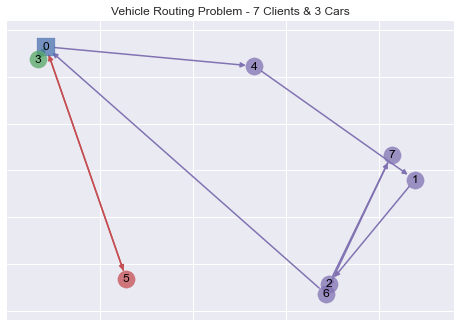

In [6]:
vrps.plot_solution()


ROUTE ACTIVATION SOLVER (Constrained Quadratic Model)
30 feasible solutions of 56.
Minimum total cost: 4182.140585938912
Number of variables: 84
Runtime: 5065.252 ms
Sample(sample={'t.1': 1.0, 't.2': 3.0, 't.3': 4.0, 't.4': 5.0, 't.5': 5.0, 't.6': 4.0, 't.7': 2.0, 'x.0.1': 1.0, 'x.0.2': 0.0, 'x.0.3': 1.0, 'x.0.4': 1.0, 'x.0.5': 0.0, 'x.0.6': 0.0, 'x.0.7': 0.0, 'x.1.0': 0.0, 'x.1.2': 0.0, 'x.1.3': 0.0, 'x.1.4': 0.0, 'x.1.5': 0.0, 'x.1.6': 0.0, 'x.1.7': 1.0, 'x.2.0': 0.0, 'x.2.1': 0.0, 'x.2.3': 0.0, 'x.2.4': 0.0, 'x.2.5': 0.0, 'x.2.6': 1.0, 'x.2.7': 0.0, 'x.3.0': 1.0, 'x.3.1': 0.0, 'x.3.2': 0.0, 'x.3.4': 0.0, 'x.3.5': 0.0, 'x.3.6': 0.0, 'x.3.7': 0.0, 'x.4.0': 1.0, 'x.4.1': 0.0, 'x.4.2': 0.0, 'x.4.3': 0.0, 'x.4.5': 0.0, 'x.4.6': 0.0, 'x.4.7': 0.0, 'x.5.0': 1.0, 'x.5.1': 0.0, 'x.5.2': 0.0, 'x.5.3': 0.0, 'x.5.4': 0.0, 'x.5.6': 0.0, 'x.5.7': 0.0, 'x.6.0': 0.0, 'x.6.1': 0.0, 'x.6.2': 0.0, 'x.6.3': 0.0, 'x.6.4': 0.0, 'x.6.5': 1.0, 'x.6.7': 0.0, 'x.7.0': 0.0, 'x.7.1': 0.0, 'x.7.2': 1.0, 'x.7.3

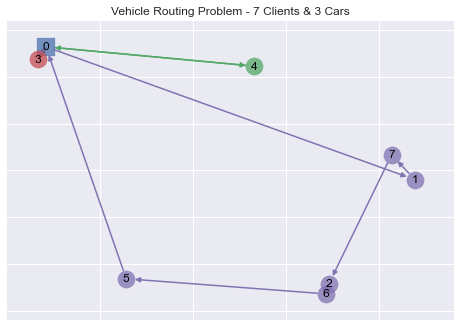

In [7]:
vrps = VRPSolver(n, m, cost, xc, yc, model=model, solver='ras', time_limit=time_limit)
vrps.solve_vrp()
vrps.plot_solution()


GUILLERMO, PARFAIT, SAÚL SOLVER (Constrained Quadratic Model)
9 feasible solutions of 39.
Minimum total cost: 7800.550948594222
Number of variables: 546
Runtime: 5070.558 ms
Sample(sample={'a.1.2': 1.0, 'a.1.3': 0.0, 'a.1.4': 1.0, 'a.1.5': 0.0, 'a.1.6': 1.0, 'a.1.7': 0.0, 'a.2.1': 0.0, 'a.2.3': 0.0, 'a.2.4': 1.0, 'a.2.5': 0.0, 'a.2.6': 0.0, 'a.2.7': 0.0, 'a.3.1': 1.0, 'a.3.2': 1.0, 'a.3.4': 1.0, 'a.3.5': 1.0, 'a.3.6': 1.0, 'a.3.7': 0.0, 'a.4.1': 0.0, 'a.4.2': 0.0, 'a.4.3': 0.0, 'a.4.5': 0.0, 'a.4.6': 0.0, 'a.4.7': 0.0, 'a.5.1': 1.0, 'a.5.2': 1.0, 'a.5.3': 0.0, 'a.5.4': 1.0, 'a.5.6': 1.0, 'a.5.7': 0.0, 'a.6.1': 0.0, 'a.6.2': 1.0, 'a.6.3': 0.0, 'a.6.4': 1.0, 'a.6.5': 0.0, 'a.6.7': 0.0, 'a.7.1': 1.0, 'a.7.2': 1.0, 'a.7.3': 1.0, 'a.7.4': 1.0, 'a.7.5': 1.0, 'a.7.6': 1.0, 'x.0.1.0.1': 0.0, 'x.0.1.0.2': 0.0, 'x.0.1.0.3': 1.0, 'x.0.1.1.1': 0.0, 'x.0.1.1.2': 0.0, 'x.0.1.1.3': 0.0, 'x.0.1.2.1': 1.0, 'x.0.1.2.2': 1.0, 'x.0.1.2.3': 0.0, 'x.0.2.0.1': 0.0, 'x.0.2.0.2': 0.0, 'x.0.2.0.3': 0.0, 'x.0.2

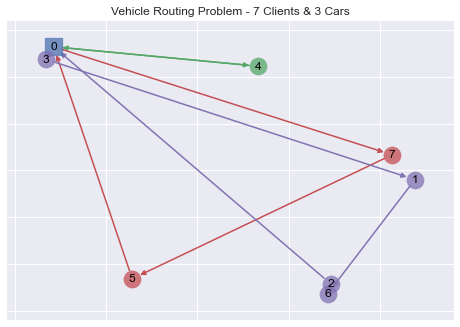

In [8]:
vrps = VRPSolver(n, m, cost, xc, yc, model=model, solver='gps', time_limit=time_limit)
vrps.solve_vrp()
vrps.plot_solution()

In [12]:
# Number of iterations to get the average approximation ratio for a particular solver
# Warning! More iterations will take more time and resources to run
n_iter = 1

In [13]:
comparison_table = compare_solvers(n, m, cost, xc, yc, n_iter=n_iter, time_limit=time_limit)


EXACT (CLASSICAL) SOLVER
Minimum cost: 3896.7953220390245
Time taken to solve: 308.692 ms

ROUTE ACTIVATION SOLVER (Constrained Quadratic Model)
32 feasible solutions of 56.
Minimum total cost: 4007.769180402653
Number of variables: 84
Runtime: 5008.208 ms
Sample(sample={'t.1': 3.0, 't.2': 2.0, 't.3': 3.0, 't.4': 5.0, 't.5': 2.0, 't.6': 1.0, 't.7': 4.0, 'x.0.1': 0.0, 'x.0.2': 0.0, 'x.0.3': 1.0, 'x.0.4': 0.0, 'x.0.5': 1.0, 'x.0.6': 1.0, 'x.0.7': 0.0, 'x.1.0': 0.0, 'x.1.2': 0.0, 'x.1.3': 0.0, 'x.1.4': 0.0, 'x.1.5': 0.0, 'x.1.6': 0.0, 'x.1.7': 1.0, 'x.2.0': 0.0, 'x.2.1': 1.0, 'x.2.3': 0.0, 'x.2.4': 0.0, 'x.2.5': 0.0, 'x.2.6': 0.0, 'x.2.7': 0.0, 'x.3.0': 1.0, 'x.3.1': 0.0, 'x.3.2': 0.0, 'x.3.4': 0.0, 'x.3.5': 0.0, 'x.3.6': 0.0, 'x.3.7': 0.0, 'x.4.0': 1.0, 'x.4.1': 0.0, 'x.4.2': 0.0, 'x.4.3': 0.0, 'x.4.5': 0.0, 'x.4.6': 0.0, 'x.4.7': 0.0, 'x.5.0': 1.0, 'x.5.1': 0.0, 'x.5.2': 0.0, 'x.5.3': 0.0, 'x.5.4': 0.0, 'x.5.6': 0.0, 'x.5.7': 0.0, 'x.6.0': 0.0, 'x.6.1': 0.0, 'x.6.2': 1.0, 'x.6.3': 0.0,

In [14]:
print('Minimum cost of best known solution:', comparison_table[0]['exact_min_cost'])
for solver_id in comparison_table[1]:
  print(f'{solver_id}:', '\t', f'average min cost = {comparison_table[1][solver_id]["avg_min_cost"]}',
                         '\t', f'average runtime = {comparison_table[1][solver_id]["avg_runtime"]}',
                         '\t', f'number of variables = {comparison_table[1][solver_id]["num_vars"]}',
                         '\t', f'approximation ratio = {comparison_table[1][solver_id]["approximation_ratio"]}'
  )

Minimum cost of best known solution: 3896.7953220390245
RAS: 	 average min cost = 4007.769180402653 	 average runtime = 5008.208 	 number of variables = 84 	 approximation ratio = 1.0284782363949156
FQS: 	 average min cost = 7734.290591241179 	 average runtime = 4937.482 	 number of variables = 240 	 approximation ratio = 1.984782353719866
GPS: 	 average min cost = 7703.598221382602 	 average runtime = 5015.631 	 number of variables = 546 	 approximation ratio = 1.976906043233403
